# Exploritary Data Analysis


# Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
plt.style.use('ggplot')

In [56]:
# Tentukan direktori tempat file-file CSV berada
input_directory = r'D:\Project\Project_cycling\data\raw'

# Menggabungkan semua file CSV dalam direktori menjadi satu DataFrame
dfs = []

for filename in os.listdir(input_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_directory, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [57]:
df.shape

(5667717, 13)

In [58]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [59]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [60]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [61]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06
mean,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01
std,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00


# Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [62]:
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])

In [63]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [64]:
df.loc[df.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [65]:
# Check for duplicate
df.loc[df.duplicated(subset=['ride_id','start_station_name', 'end_station_name'])]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [66]:
df['Ride_Length']=(df['ended_at']-df['started_at']).apply(lambda x: round(x.total_seconds()/60))
df = df[df['Ride_Length'] > 0]

In [67]:
df['Date']=df['started_at'].apply(lambda x : x.date())

In [68]:
def categorize_time(time_str):
    # Pisahkan jam dan menit
    hour, minute = map(int, time_str.split(':'))
    
    # Konversi ke bentuk desimal
    desimal_time = hour + (minute/ 60)
    
    # Kategorisasi berdasarkan waktu desimal
    if 5 <= desimal_time < 12:
        return "Morning"
    elif 12 <= desimal_time < 17:
        return "Afternoon"
    elif 17 <= desimal_time < 20:
        return "Evening"
    else:
        return "Night"

In [69]:
df['Time_Category']=df['started_at'].dt.strftime('%H:%M').apply(lambda x : categorize_time(x))

In [70]:
def get_season(Date):
    month = int(Date.strftime("%m"))
    day = int(Date.strftime("%d"))
    # Season
    if (month == 12 and day >= 21) or (month <= 2 and day < 20):
        return "Winter"
    elif (month == 3 and day >= 20) or (month == 4) or (month == 5 and day < 21):
        return "Spring"
    elif (month == 6 and day >= 21) or (month == 7) or (month == 8 and day < 23):
        return "Summer"
    else:
        return "Autumn"

In [71]:
df['Season']=df['Date'].apply(lambda x : get_season(x))

In [72]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_Length,Date,Time_Category,Season
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,3,2022-01-13,Morning,Winter
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,4,2022-01-10,Morning,Winter
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,4,2022-01-25,Night,Autumn
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,15,2022-01-04,Night,Winter
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,6,2022-01-20,Night,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667712,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,4,2022-12-05,Morning,Autumn
5667713,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,13,2022-12-14,Evening,Autumn
5667714,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,5,2022-12-08,Afternoon,Autumn
5667715,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,4,2022-12-28,Morning,Winter


In [73]:
df=df[['ride_id', 'rideable_type', 'Date', 'Season', 'Time_Category', 
       'Ride_Length', 'start_station_name', 'end_station_name',
       'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']]

In [74]:
# Rename our columns
df = df.rename(columns={'ride_id':'Ride_id', 'rideable_type':'Rideable_Type',
       'start_station_name':'Start_Station_Name', 'end_station_name':'End_Station_Name',
       'start_lat':'Start_Lat', 'start_lng':'Start_Lng', 'end_lat':'End_Lat', 'end_lng':'End_Lng',
       'member_casual':'Member_Status'})

In [75]:
df['Member_Status']=df['Member_Status'].str.title()
df['Rideable_Type']=df['Rideable_Type'].str.title()

In [76]:
df

,Ride_id,Rideable_Type,Date,Season,Time_Category,Ride_Length,Start_Station_Name,End_Station_Name,Start_Lat,Start_Lng,End_Lat,End_Lng,Member_Status
0,C2F7DD78E82EC875,Electric_Bike,2022-01-13,Winter,Morning,3,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,Casual
1,A6CF8980A652D272,Electric_Bike,2022-01-10,Winter,Morning,4,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,Casual
2,BD0F91DFF741C66D,Classic_Bike,2022-01-25,Autumn,Night,4,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,Member
3,CBB80ED419105406,Classic_Bike,2022-01-04,Winter,Night,15,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,Casual
4,DDC963BFDDA51EEA,Classic_Bike,2022-01-20,Autumn,Night,6,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,Member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667712,43ABEE85B6E15DCA,Classic_Bike,2022-12-05,Autumn,Morning,4,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,41.883165,-87.651100,41.877642,-87.649618,Member
5667713,F041C89A3D1F0270,Electric_Bike,2022-12-14,Autumn,Evening,13,Bernard St & Elston Ave,Seeley Ave & Roscoe St,41.949980,-87.714019,41.943403,-87.679618,Member
5667714,A2BECB88430BE156,Classic_Bike,2022-12-08,Autumn,Afternoon,5,Wacker Dr & Washington St,Green St & Madison St,41.883143,-87.637242,41.881859,-87.649264,Member
5667715,37B392960E566F58,Classic_Bike,2022-12-28,Winter,Morning,4,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,41.883165,-87.651100,41.877642,-87.649618,Member


In [ ]:
df.to_csv(r'D:\Project\Project_cycling\data\processed\290923cyclisticupdate.csv', index=False)

In [3]:
df1=pd.read_csv(r'D:\Project\Project_cycling\data\processed\290923cyclisticupdate.csv')

In [4]:
df1.head()

,Ride_id,Rideable_Type,Date,Season,Time_Category,Ride_Length,Start_Station_Name,End_Station_Name,Start_Lat,Start_Lng,End_Lat,End_Lng,Member_Status
0,C2F7DD78E82EC875,Electric_Bike,2022-01-13,Winter,Morning,3,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,Casual
1,A6CF8980A652D272,Electric_Bike,2022-01-10,Winter,Morning,4,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,Casual
2,BD0F91DFF741C66D,Classic_Bike,2022-01-25,Autumn,Night,4,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,Member
3,CBB80ED419105406,Classic_Bike,2022-01-04,Winter,Night,15,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,Casual
4,DDC963BFDDA51EEA,Classic_Bike,2022-01-20,Autumn,Night,6,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,Member


<Axes: xlabel='Member_Status'>

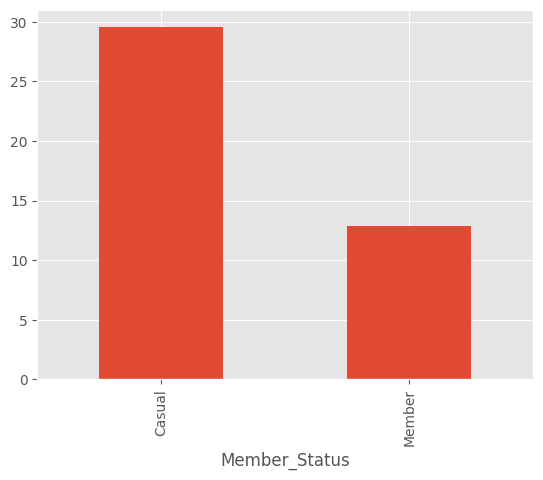

In [24]:
new_var = df1.groupby('Member_Status')['Ride_Length'].mean().plot(kind='bar')
new_var

<Axes: ylabel='Ride_id'>

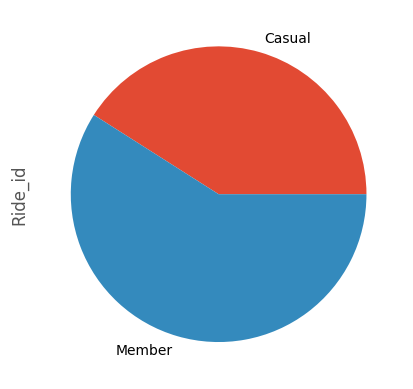

In [48]:
df1.groupby('Member_Status')['Ride_id'].count().plot(kind='pie')

In [31]:
df1.groupby(['Member_Status', 'Rideable_Type'])['Ride_id'].count()

Member_Status  Rideable_Type
Casual         Classic_Bike      883602
               Docked_Bike       176490
               Electric_Bike    1230828
Member         Classic_Bike     1692324
               Electric_Bike    1605565
Name: Ride_id, dtype: int64

<Axes: ylabel='Start_Station_Name'>

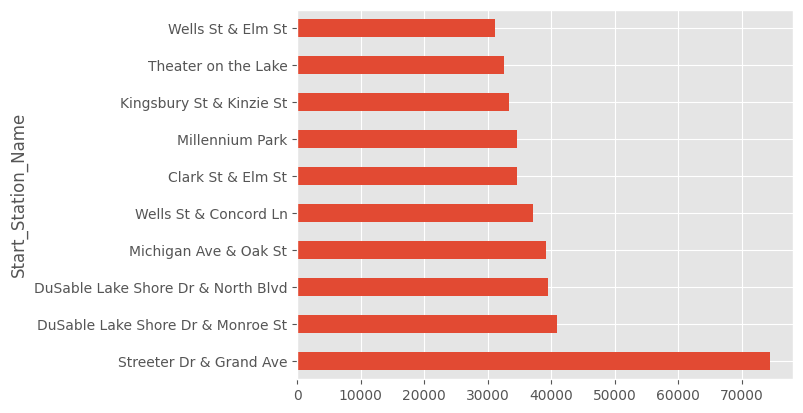

In [38]:
df1.groupby('Start_Station_Name')['Ride_id'].count().sort_values(ascending=False).head(10).plot(kind='barh')

In [51]:
df1.groupby('End_Station_Name')['Ride_id'].count().head(10).reset_index

<bound method Series.reset_index of End_Station_Name
10101 S Stony Island Ave                 4
111th St - Morgan Park Metra            11
2112 W Peterson Ave                   1039
532 E 43rd St                           33
63rd & Western Ave - north corner       15
63rd & Western Ave - south corner        9
63rd St Beach                          899
83rd St (Avalon Park) Metra              2
900 W Harrison St                    11675
Abbott Park                             15
Name: Ride_id, dtype: int64>